In [1]:
import numpy as np

In [24]:
# Độ dài của vector
def compute_vector_length(vector):
    len_of_vector = np.sqrt(sum(vector**2))
    # len_of_vector = np.linalg.norm(vector)
    return len_of_vector


vector = np.array([-2, 4, 9, 21])
print(compute_vector_length(vector))

23.280893453645632


In [25]:
# Phép tích vô hướng
def compute_dot_product(vector1, vector2):
    # result = np.dot(vector1, vector2)
    result = vector1.dot(vector2)
    return result


x = np.array([0, 1, -1, 2])
y = np.array([2, 5, 1, 0])
print(compute_dot_product(x, y))

4


In [26]:
# Nhân vector với ma trận
def matrix_multi_vector(matrix, vector):
    if matrix.shape[1] != vector.shape[0]:
        return None

    result = matrix.dot(vector)
    return result


matrix_1 = np.array([[-1, 1, 1], [0, -4, 9]])
vector = np.array([0, 2, 1])

print(matrix_multi_vector(matrix_1, vector))

[3 1]


In [ ]:
# Nhân ma trận với ma trận

def matrix_multi_matrix(matrix1, matrix2):
    if matrix1.shape[1] != matrix2.shape[0]:
        matrix2 = matrix2.T
        if matrix1.shape[1] != matrix2.shape[0]:
            return None

    result = matrix1.dot(matrix2)
    return result

matrix_1 = np.array([[1, 2, 3], [4, 5, 6]])
matrix_2 = np.array([[1, 2], [4, 6], [2,5]])
matrix_3 = np.array([[1, 5, 3], [1, 7, 6]])
matrix_4 = np.array([[1, 5, 3], [1, 7, 6],[3,4,9]])


print(matrix_multi_matrix(matrix_1, matrix_2))
print(matrix_multi_matrix(matrix_1, matrix_3))
print(matrix_multi_matrix(matrix_4, matrix_2))

[[15 29]
 [36 68]]
[[20 33]
 [47 75]]
[[27 47]
 [41 74]
 [37 75]]


In [22]:
# Cosine Similarity
def compute_cosine(v1, v2):
    # tính tích vô hướng
    dot_product = np.dot(v1, v2)

    # Tính chuẩn euclid (norm) của mỗi vector
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)

    # Kiểm tra norm của v1, v2 khác 0
    if norm_v1 == 0 or norm_v2 == 0:
        return None
    
    cos_sim = dot_product / (norm_v1 * norm_v2)

    return cos_sim

vec_a = np.array([1, 2, 3, 4])
vec_b = np.array([1, 0, 3, 0])
vec_c = np.array([5, 6, 7])
print(compute_cosine(vec_a, vec_b))


0.5773502691896257


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Đọc hình và resize lại cho cùng kích thước
path = "./data/"
bg1_image = cv2.imread(path + "GreenBackground.png",1)
bg1_image = cv2.resize(bg1_image, (678,381))

ob_image =cv2.imread(path + "Object.png",1)
ob_image = cv2.resize(ob_image, (678,381))

bg2_image = cv2.imread(path + "NewBackground.jpg", 1)
bg2_image = cv2.resize(bg2_image, (678,381))

uint8


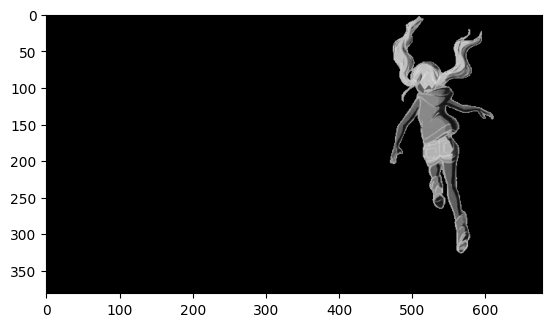

In [60]:
def compute_difference(bg_img, ob_img):
    # return np.abs(bg_img - ob_img)
    return np.abs(bg_img - ob_img).mean(axis=2)
    


diff = compute_difference(bg1_image,ob_image)

# diff = cv2.absdiff(bg1_image, ob_image)
plt.imshow(cv2.cvtColor(diff.astype(np.uint8), cv2.COLOR_BGR2RGB))

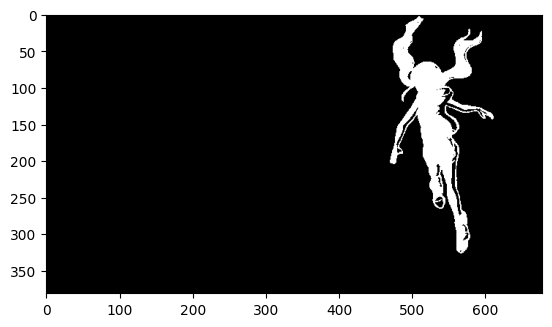

In [61]:
def compute_binary_mask(difference_single_channel):
    return (difference_single_channel > 50).astype(np.uint8) * 255

binary_mask = compute_binary_mask(diff)
plt.imshow(cv2.cvtColor(binary_mask, cv2.COLOR_BGR2RGB))

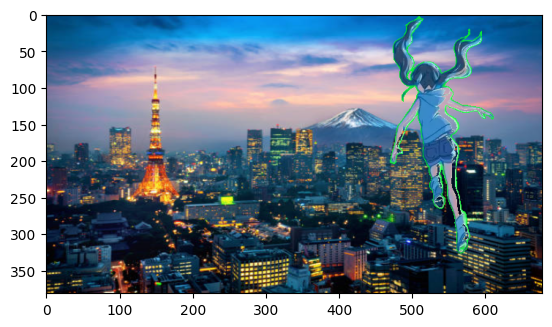

In [ ]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)

    binary_mask = compute_binary_mask(difference_single_channel)
    binary_mask = np.expand_dims(binary_mask, axis=2) # Thêm chiều vào binary_mask để biến thành 3 kênh
    output = np.where(binary_mask == 255, ob_image, bg2_image)
    return output

output = replace_background(bg1_image, bg2_image, ob_image)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))